# Example Process of GARCH

Author: Moritz Ahl 

Date: January 2022

Software: Windows 10, Python 3.9, Jupyter Notebook 6.4.5

The purpose of this program is to create a sample path of a GARCH(p,q) process using basic packages in Python. 

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
# import package to compute and plot ACF
from statsmodels.graphics.tsaplots import plot_acf

Let's define a function to generate a sample path for a GARCH(p,q) process $X$ following the formula given in the definition:


\begin{align}
X_t &= \sigma_t \epsilon_t, \\
\sigma_t^2 &= \alpha_0 + \sum_{i=1}^p \alpha_i X_{t-i}^2 + \sum_{j=1}^q \beta_j \sigma_{t-j}^2,
\end{align}
where $\sigma = \left( \sigma_t \right)_{t \in I}$ is a strictly positive-valued process, $\alpha_0 >0$, $\alpha_i \geq 0$, $i = 1, \dots, p$, and $\beta_j \geq 0$, $j = 1, \dots, q$.

Moreover, $\epsilon = \left( \epsilon_t \right)_{t \in I}$ is a strict white noise process, i.e. a series of iid random variables with finite values, with mean $0$ and variance $1$.

In this example we will use Gaußian innovations $\epsilon$, i.e. $\epsilon_t \sim \mathcal{N}(0,1)$ for all $t \in I$.

Also remember the necessary and sufficient condition for covaraiance stationarity of GARCH processes:
\begin{equation*}
\sum_{i=1}^p \alpha_i + \sum_{j=1}^q \beta_j <1.
\end{equation*}

In [2]:
def GARCH(n, alpha, beta = 0, overview = False, plot = False): 
    # Simulation of a (G)ARCH process with Gaußian innovations
    # Inspired by and based on:
    # https://goldinlocks.github.io/ARCH_GARCH-Volatility-Forecasting/, as of 04 August 2021
    
    # seeding 
    np.random.seed(47)
    
    # prepare parameters 
    p = len(np.atleast_1d(alpha)) - 1  # remember alpha_0 also in alpha
    q = len(np.atleast_1d(beta))

    # warning if process instationary
    #if alpha[1] >= 3.562:
    #    print('Warning: No strict stationary solution for alpha = ',alpha[1],'!')

    # Initialize the storage vectors 
    wn = np.random.normal(size = n)    # white noise process with Gaußian innovations
    y = np.zeros(n)
    var = np.zeros(n)
    
    for t in range(1, n):
        # compute process according to formula 
        # with Gaußian innovations and for different alpha, beta
        val = alpha[0] 
        if p > 0:
            # use min(p,t) to avoid error
            for i in range(min(p,t)):  
                val += alpha[i+1] * y[t-(i+1)]**2 
        if q == 1:
            b = beta[0]
            val += b * var[t-1]
        else:
            for j in range(min(q,t)):
                val += beta[j] * var[t-(j+1)]
        var[t] = val

        # Simulate the residuals
        y[t] = np.sqrt(var[t]) * wn[t] 

    # simple plot of process if asked for 
    if plot == True:
        #plt.plot(wn,color = 'red', label = 'GARCH Residual') 
        plt.plot(y,linewidth = 0.6)

        # switch to log scale if necessary according to condition for covariance stationarity
        if np.sum(alpha) + np.sum(beta) - alpha[0] > 1 :
            plt.yscale('symlog')

        plt.show() 

    # plot process, variance, ACF, squared ACF 
    if overview == True:
        fig, axs = plt.subplots(2,2)
        axs[0,0].plot(y,lw=0.5)
        axs[0,1].plot(var,lw=0.5)
        plot_acf(y, lags=30, ax=axs[1,0], alpha=.05,title='',lw=0.5)
        squared = np.square(y)
        plot_acf(squared, lags=30, ax=axs[1,1], alpha=.05,title='',lw=0.5)
        plt.legend
        plt.show()
        
    return y, var

To get a better intuition for GARCH processes, let us compare GARCH(1,1) sample paths for different $\alpha_1$ and $\beta_1$, including instatinary paths.

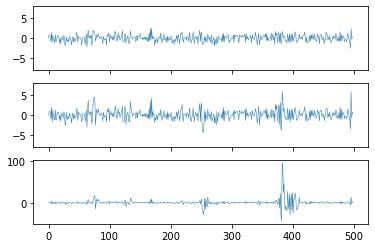

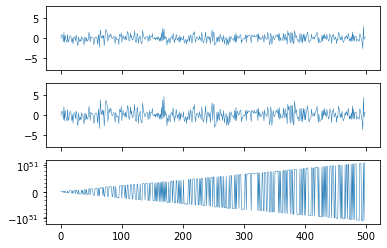

In [3]:
# create sample paths for different values of alpha_1
samp1, var1 = GARCH(n = 500, alpha = [0.5, 0.1], beta = [0.2])
samp2, var2 = GARCH(n = 500, alpha = [0.5, 0.5], beta = [0.2])
samp3, var3 = GARCH(n = 500, alpha = [0.5, 1.0], beta = [0.2])

# compare paths in a plot 
fig, axs = plt.subplots(3,1)
axs[0].plot(samp1, lw = .5)
axs[0].set_ylim(-8,8)
axs[1].plot(samp2, lw = .5)
axs[1].set_ylim(-8,8)
axs[2].plot(samp3, lw = .5)
for ax in fig.get_axes():
    ax.label_outer()
    
plt.savefig('C:/Users/morit/Documents/Studium/Master-Arbeit 2021/Master Thesis TeX/figures/GARCH_alpha.pdf')    
plt.show()


# create sample paths for different values of beta_1
samp4, var4 = GARCH(n = 500, alpha = [0.5, 0.2], beta = [0.1])
samp5, var5 = GARCH(n = 500, alpha = [0.5, 0.2], beta = [0.5])
samp6, var6 = GARCH(n = 500, alpha = [0.5, 0.2], beta = [1.5])

# compare paths in a plot 
fig, axs = plt.subplots(3,1)
axs[0].plot(samp4, lw = .5)
axs[0].set_ylim(-8,8)
axs[1].plot(samp5, lw = .5)
axs[1].set_ylim(-8,8)
axs[2].plot(samp6, lw = .5)
axs[2].set_yscale('symlog')
yticks = [-10e50, 0, 10e50]
axs[2].set_yticks(yticks)
for ax in fig.get_axes():
    ax.label_outer()
    
plt.savefig('C:/Users/morit/Documents/Studium/Master-Arbeit 2021/Master Thesis TeX/figures/GARCH_beta.pdf')
plt.show()